In [1]:
import geopandas as gpd;gpd.__version__

'0.13.0'

# 2 geopandas 0.13版本更新内容一览

## 2.1 新增要素坐标快速提取方法get_coordinates()

In [2]:
from shapely.geometry import Point, LineString, Polygon, MultiPoint, MultiLineString, MultiPolygon

- **针对点要素**

In [3]:
# 针对点要素
(
    gpd
    .GeoSeries(
        [Point(0, 0), MultiPoint([Point(i, i) for i in range(3)])],
        index=['要素1', '要素2']
    )
    .get_coordinates()
)

,x,y
要素1,0.0,0.0
要素2,0.0,0.0
要素2,1.0,1.0
要素2,2.0,2.0


- **针对线要素**

In [4]:
# 针对线要素
(
    gpd
    .GeoSeries(
        [
            LineString([(0, 0), (0, 1), (1, 1)]),
            MultiLineString([LineString([(0, 0), (0, 1), (1, 1)]),
                             LineString([(0, 0), (0, -1), (-1, -1)])])
        ],
        index=['要素1', '要素2']
    )
    .get_coordinates()
)

,x,y
要素1,0.0,0.0
要素1,0.0,1.0
要素1,1.0,1.0
要素2,0.0,0.0
要素2,0.0,1.0
要素2,1.0,1.0
要素2,0.0,0.0
要素2,0.0,-1.0
要素2,-1.0,-1.0


- **针对面要素**

In [5]:
# 针对面要素
(
    gpd
    .GeoSeries(
        [
            Polygon([(0, 0), (0, 1), (1, 1)]),
            MultiPolygon([Polygon([(0, 0), (0, 1), (1, 1)]),
                          Polygon([(0, 0), (0, -1), (-1, -1)])])
        ],
        index=['要素1', '要素2']
    )
    .get_coordinates()
)

,x,y
要素1,0.0,0.0
要素1,0.0,1.0
要素1,1.0,1.0
要素1,0.0,0.0
要素2,0.0,0.0
要素2,0.0,1.0
要素2,1.0,1.0
要素2,0.0,0.0
要素2,0.0,0.0
要素2,0.0,-1.0


## 2.2 导出GeoJSON字符串支持自定义坐标系

In [6]:
demo_gdf = gpd.GeoDataFrame(
    {
        'value': range(3),
        'geometry': [Point(0, 0)] * 3
    },
    crs='EPSG:4326'
)

demo_gdf.to_crs('EPSG:2381', inplace=True)
eval(demo_gdf.to_json())

{'type': 'FeatureCollection',
 'features': [{'id': '0',
   'type': 'Feature',
   'properties': {'value': 0},
   'geometry': {'type': 'Point',
    'coordinates': [-11343861.0719854, 20003940.842452813]}},
  {'id': '1',
   'type': 'Feature',
   'properties': {'value': 1},
   'geometry': {'type': 'Point',
    'coordinates': [-11343861.0719854, 20003940.842452813]}},
  {'id': '2',
   'type': 'Feature',
   'properties': {'value': 2},
   'geometry': {'type': 'Point',
    'coordinates': [-11343861.0719854, 20003940.842452813]}}],
 'crs': {'type': 'name', 'properties': {'name': 'urn:ogc:def:crs:EPSG::2381'}}}

## 2.3 新增要素最小外切圆计算相关方法

In [7]:
demo_gdf = gpd.GeoDataFrame(
    geometry=[Polygon([(0, 0), (0, 1), (1, 1)])]
)
demo_gdf.minimum_bounding_radius()

0    0.707107
dtype: float64

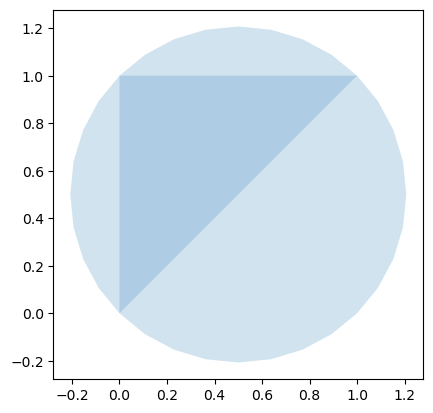

In [8]:
ax = demo_gdf.plot(alpha=0.2)
demo_gdf.minimum_bounding_circle().plot(ax=ax, alpha=0.2);

## 2.4 新增随机点采样方法sample_points()

In [9]:
import geodatasets

# 读取示例数据集
nybb = gpd.read_file(geodatasets.get_path("nybb"))
nybb.head(3)

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."


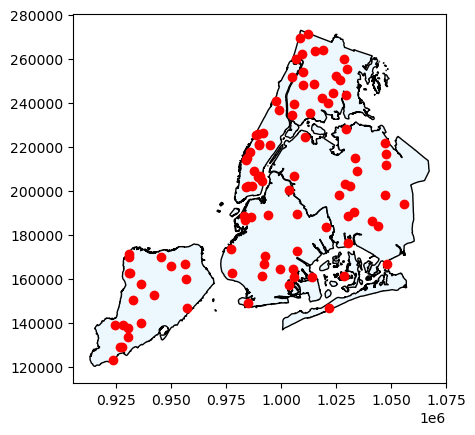

In [10]:
# 各要素内固定数量采样
ax = nybb.plot(facecolor='#74c0fc20', edgecolor='black')
nybb.sample_points(20).plot(ax=ax, color='red');

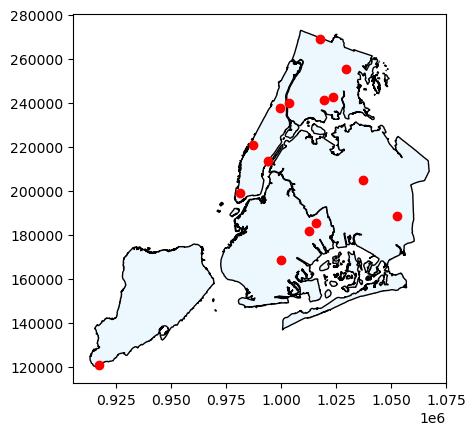

In [11]:
# 分要素单独设定采样数量
ax = nybb.plot(facecolor='#74c0fc20', edgecolor='black')
nybb.sample_points(range(1, 6)).plot(ax=ax, color='red');

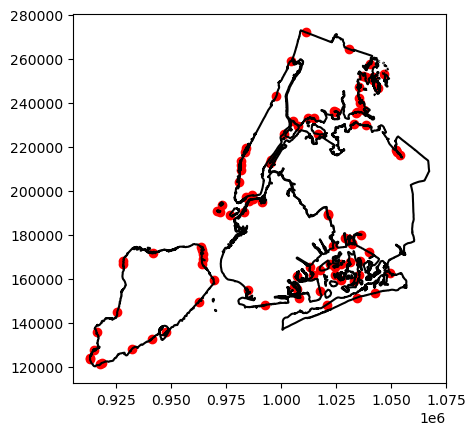

In [12]:
ax = nybb.boundary.plot(edgecolor='black')
nybb.boundary.sample_points(20).plot(ax=ax, color='red');